In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv(r'C:\Users\user\Downloads\falcon9_cleaned.csv')

# Quick preview
df.head()

,Date,Booster_Version,Launch_Site,Payload,PayloadMass,Orbit,Customer,Outcome,Landing_Outcome,Class
0,2010-06-04,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute),1
1,2010-12-08,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),1
2,2012-05-22,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt,1
3,2012-10-08,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,1
4,2013-03-01,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,1


# SpaceX Falcon 9 Launch EDA
This notebook explores the cleaned launch data using visualizations to understand patterns in mission outcomes.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned file
df = pd.read_csv(r'C:\Users\user\Downloads\falcon9_cleaned.csv')
df.head()

,Date,Booster_Version,Launch_Site,Payload,PayloadMass,Orbit,Customer,Outcome,Landing_Outcome,Class
0,2010-06-04,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute),1
1,2010-12-08,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),1
2,2012-05-22,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt,1
3,2012-10-08,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,1
4,2013-03-01,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,1


1. Overall Mission Outcome Count

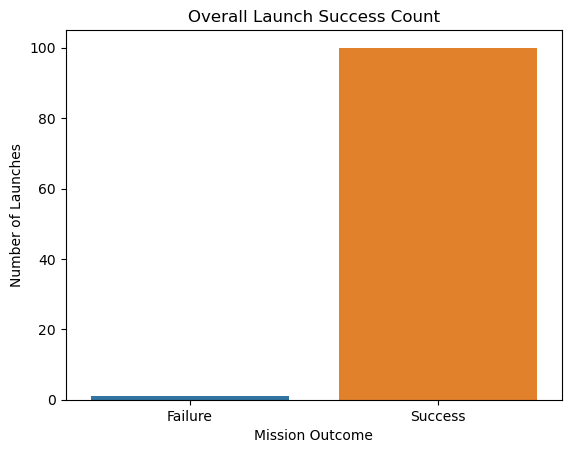

In [4]:
sns.countplot(data=df, x='Class')
plt.title('Overall Launch Success Count')
plt.xticks([0, 1], ['Failure', 'Success'])
plt.xlabel('Mission Outcome')
plt.ylabel('Number of Launches')
plt.show()


2. Launch Site vs Success Rate

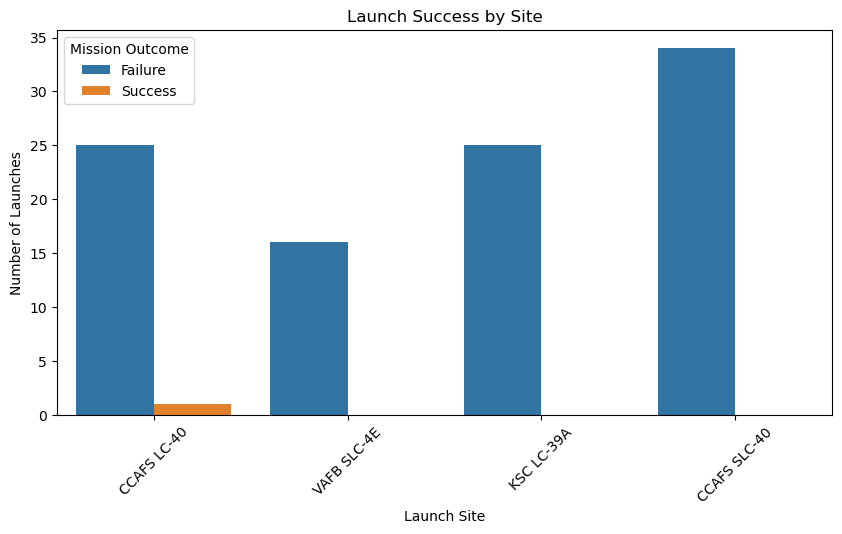

In [6]:
plt.figure(figsize=(10, 5))

# ✅ Convert 'Class' column to string just for plotting
sns.countplot(data=df, x='Launch_Site', hue=df['Class'].astype(str))

plt.title('Launch Success by Site')
plt.xticks(rotation=45)
plt.ylabel('Number of Launches')
plt.xlabel('Launch Site')
plt.legend(title='Mission Outcome', labels=['Failure', 'Success'])  # Optional custom legend
plt.show()

3. Payload Mass vs Launch Outcome

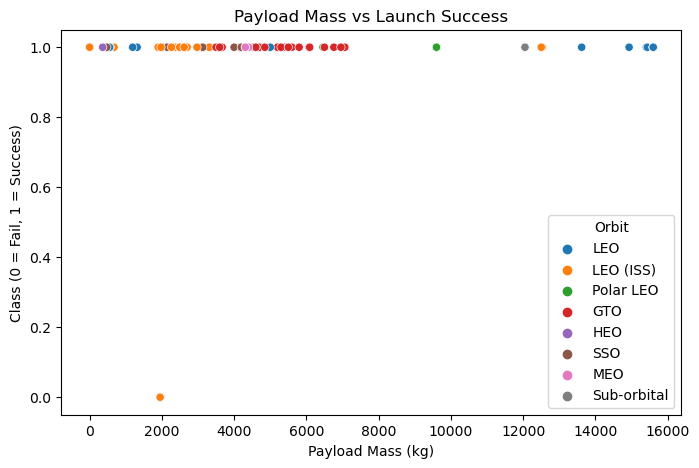

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PayloadMass', y='Class', hue='Orbit')
plt.title('Payload Mass vs Launch Success')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Class (0 = Fail, 1 = Success)')
plt.show()

4. Booster Version vs Launch Outcome

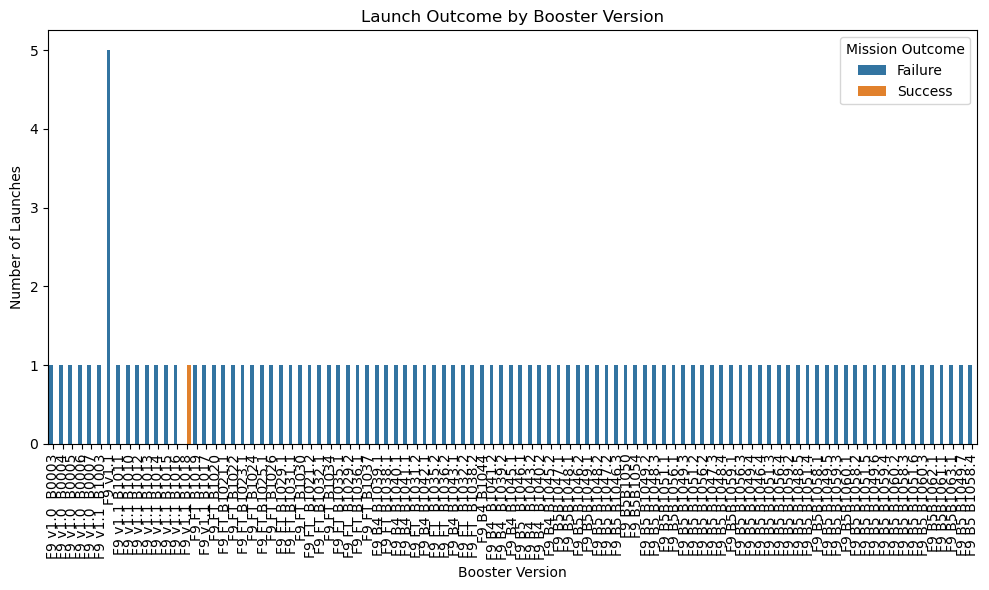

In [9]:
plt.figure(figsize=(10, 6))

# Fix: Convert 'Class' to string inside hue
sns.countplot(data=df, x='Booster_Version', hue=df['Class'].astype(str))

plt.title('Launch Outcome by Booster Version')
plt.xticks(rotation=90)
plt.xlabel('Booster Version')
plt.ylabel('Number of Launches')
plt.legend(title='Mission Outcome', labels=['Failure', 'Success'])
plt.tight_layout()
plt.show()

5. Orbit Type vs Success

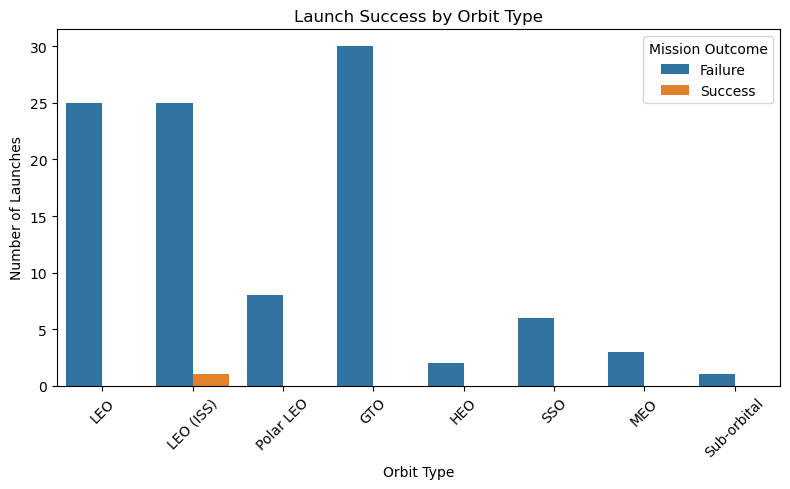

In [11]:
plt.figure(figsize=(8, 5))

# Fix: Convert 'Class' to string for legend
sns.countplot(data=df, x='Orbit', hue=df['Class'].astype(str))

plt.title('Launch Success by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(title='Mission Outcome', labels=['Failure', 'Success'])
plt.tight_layout()
plt.show()

6. Correlation Heatmap (Numeric Fields)

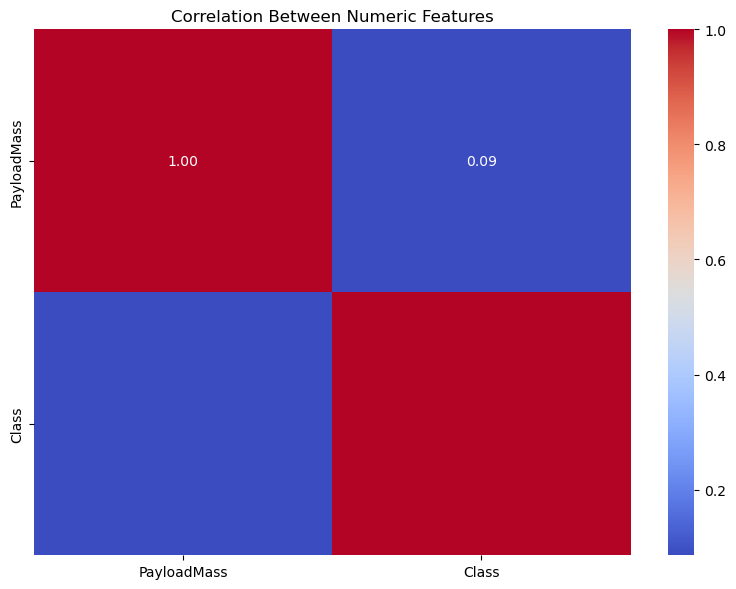

In [13]:
import numpy as np

plt.figure(figsize=(8, 6))

# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

# Now plot the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

## 🔍 Summary of EDA Insights

- Some launch sites have a higher success rate than others.
- Payload mass shows weak correlation with launch outcome.
- Newer booster versions may be more successful.
- Orbit types affect success slightly.
